In [1]:
%matplotlib inline

**Every application is different**. We cannot offer a single evaluation metric that is right for any classification problem, or regression problem, or whatever problem you may encounter. Ther term **machine learning diagnostic** is often used to describe a test that can be run to gain insight about what is and isn't working in a machine learning model. Generally, when designing a machine laerning model,it's advisable to formulate a diagnostic for the model in parallel.

Another interesting aspect of machine learning is that without knowing the nature of the data we are trying to fit, we can make no assumption about which machine learning model we can use to fit the sample data. The axiom is known as the **No Free Lunch** theorem: "Wothout prior assumptions about the nature of a learning algorithm, no learning algorithm is superior or inferior to any other (or even random guessing)".

Minimizing the error or cost function of a formulated machine learning model is generally not enough to determine how well the model fits the supplied training data.

An estimated model is said to be **underfit** if it exhibits a large error in prediction. However, a formulated model with low error or cost function could also indicate that model doesn't understand the underlying relationship between the given features of the model. Rather, **the model is memorizing** the supplied data, and this known as **overfitting**. 

**An underfit model is also said to exhibit high bias and a overfit is said to have a high variance**. A model that describes a good fit for the sample data will have low overal error and can predict the dependent variable correctly from previously unseen values for the independent variables in our model.

It is useful to think of a **positive example** as one worth of atterntion or **alarm**, and a negative example as uninteresting or benign.

### Evaluating a Model

We can plot the variance of the dependent and independent variables of a model to determine if the model is underfit or overfit.  However, with a parge number of feaures, we need a better way to visualize how well the model generalizes the relationship of the dependent and independet variables.

If a selected model has a high error value for both training and cross-validation error, then the model is underfitting the supplied training data. On the other hand, a low training error and a high cross-validation error indicates that the model is overfit.

### Learning curves

A learning curve is essentially a plot of the error values in a model over the number of samples by which it is trained and cross-valdiated. Theu can be used to diagnose **underfit and overfit model**.

### Plain Accuracy and its problems
Classification accuracy is a popular metric because it's very easy to measure. Unfortunately, it is usually yoo simplistic for applications of data mining techniques to real business problems. To understand these problem we need a way to decompose and count different types of correct and incorrect decisions made by a classifier.

$$\text{accuracy} = \cfrac{\text{Number of correct decisions}}{\text{Total number of decisions}}$$




### Confusion Matrix
To evaluate a classifier properñy to understand the notion of **class confusion** is necessary to use the confusion matrix. It is a kind of contingency matrix. A confusion matrix separates the decision made by the classifier, making explicit how one class is being confused for another. In the confusion matrix, the main diagonal contains the counts of correct decisions. Confusion matrix is also known as **error matrix**.

### Unbalanced classes
Because the usunual or interesting class is rare among the general population, the class distribution is unbalanced or **skewed**. We need to know the proportion of positive or case of interest in our datasets. Unfortunately, as the class distribution becomes more skewed, evaluation based on accuracy breaks down. Even when the skew domains is not so great, in domains where one class is more prevalent than another accuracy can be greatly misleading. With such skewed domains the base rate for the majority class could be very high, so a report accuracy may tell us little about what data mining has really accomplished. Even when the skew it not so great, in domains where one class is more prevalent than another accuracy can be greatle misleading.


### Generalizing beyond classification
Why is the mean-squared error on the predicted number of stars an appropriate metric for our recommendations problem? It it meaningful? is there a better metric? Hopefully, the analyst has thought this through carefully.

While the probabilities can be estimated from data, the **costs** and **benefits** often cannot. They generally depend on external information provided by analysis of the consequences of decisions in the context of the specific **business problem**. Indeed, specifying the costs and benefits may take a great deal of time and though. In many cases, average estimated costs and benefits are used rather than individual-specific costs and benefits, for simplicity of problem formulation and calculation.

Instead of computing accuracies for the competing models, we would compute expected values. Furthermore, using this alternative formulation, we can compare the two models even though one analyst tested using a representative distribution and the other tested using a class-balanced distribution.

### Evaluation, Baseline Performance, and Implications for Investments in Data
It is important to consider carefully what would be a reasonable baseline against which to compare the model performance. A data scientitest will often need to implement an alternative model, usually one that is simple but not simplistic, in order to justify continuing the data mining effort. 

Each model performs considerably better than random guessing, and both are so easy to compute that they make natura baselines of comparison. Any new,more complex model must beat these. 

What are some general guidelines for good baselines? For classification task, one good baseline is the **majority classifier**, a naive classifier that always chooses that majority class of the training dataset.

Maximizing simple prediction accuracy is usually not an appropriate goal. If that's what our algorithm is doing, we're using the wrong algorithm. For regression problem, we have a directly analougous baseline: predict the average value over the population.

Moving beyond these sample baseline models, a slightly more complex alternative that only considers a very small amount of feature information. One xample of mining such single-feature predictive models from data is to use tree induction to build a **decision stump** - a decision tree with only one internal node, the root node.  A decision stump often produce quite good baseline performance on many of the test datasets used in machine learning reaearch.

Beyond comparing simple models (and reduced-data models), it is often useful to implement simple, inexpensive models based on domain knowledge or "receive wisdom" and evaluate their performance.

### Learning Curves

If a model is too complex for a given training dataset, it means there are too many degrees of freedom or parameters in this model, and therefore the model tends to overfit (high variance) the training data and doesn't generalize well on test data. By plottinh the model training and validation accuracies as functions of the training set size, it's possible to detect whether the model suffers from high variance of high bias, and wheter with more data we could improve the model by decreasing variance. If the model has a high bias we can increase the number of parameters or decrease the regularization parameter.

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]] # we use two features for visualization purposes
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

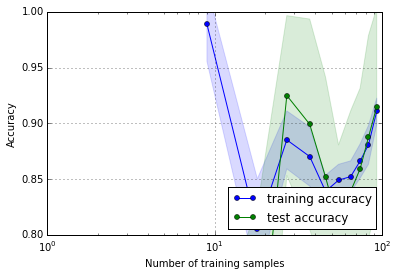

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# learning curve uses stratified k-fold cross-validation

pipe_lr = Pipeline([
        ('scl', StandardScaler()),
        ('clf', LogisticRegression(
            penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores = \
        learning_curve(estimator=pipe_lr,
                      X=X_train,
                      y=y_train,
                      train_sizes=np.linspace(0.1, 1.0, 10), 
                      cv=10,
                      n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker = 'o',
        markersize=5, label='training accuracy')

plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, 
         color='blue', alpha = 0.15)

plt.plot(train_sizes, test_mean, 
         color='green', marker = 'o',
        markersize=5, label='test accuracy')

plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, 
         color='green', alpha = 0.15)

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

### Improving a model

* Add or remove some features: this technique is used for both underfit and overfit model.
* vary the value of the regularization parameter.
* Gather more training data. For improving and overfit model.
* Add features which are polynomial terms of the features in the model. This method can be used to improve an underfit model.

In [8]:
# More Information
from IPython.display import IFrame
IFrame('http://people.stern.nyu.edu/fprovost/Papers/rocch-mlj.pdf', width=900, height=350)

In [9]:
# More Information
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Precision_and_recall', width=900, height=350)

In [10]:
# More Information
from IPython.display import IFrame
IFrame('http://www.ucd.ie/geary/static/publications/workingpapers/gearywp201204.pdf', width=900, height=350)